<a href="https://colab.research.google.com/github/Ramdao/SoftwarePackagesHW-1-2-3-/blob/main/Problem_set3_Software_Packages_Tashrif_Radin_Ali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.	Analyse customer behaviour to segment customers for targeted marketing.

In [ ]:
df = pd.read_csv("online_retail_II.csv",on_bad_lines='skip')
dfshort= df[:1000]
dfshort

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
995,536520,22469,HEART OF WICKER SMALL,1,12/1/2010 12:43,1.65,14729.0,United Kingdom
996,536520,22100,SKULLS SQUARE TISSUE BOX,1,12/1/2010 12:43,1.25,14729.0,United Kingdom
997,536520,22096,PINK PAISLEY SQUARE TISSUE BOX,1,12/1/2010 12:43,1.25,14729.0,United Kingdom
998,536520,22583,PACK OF 6 HANDBAG GIFT BOXES,1,12/1/2010 12:43,2.55,14729.0,United Kingdom


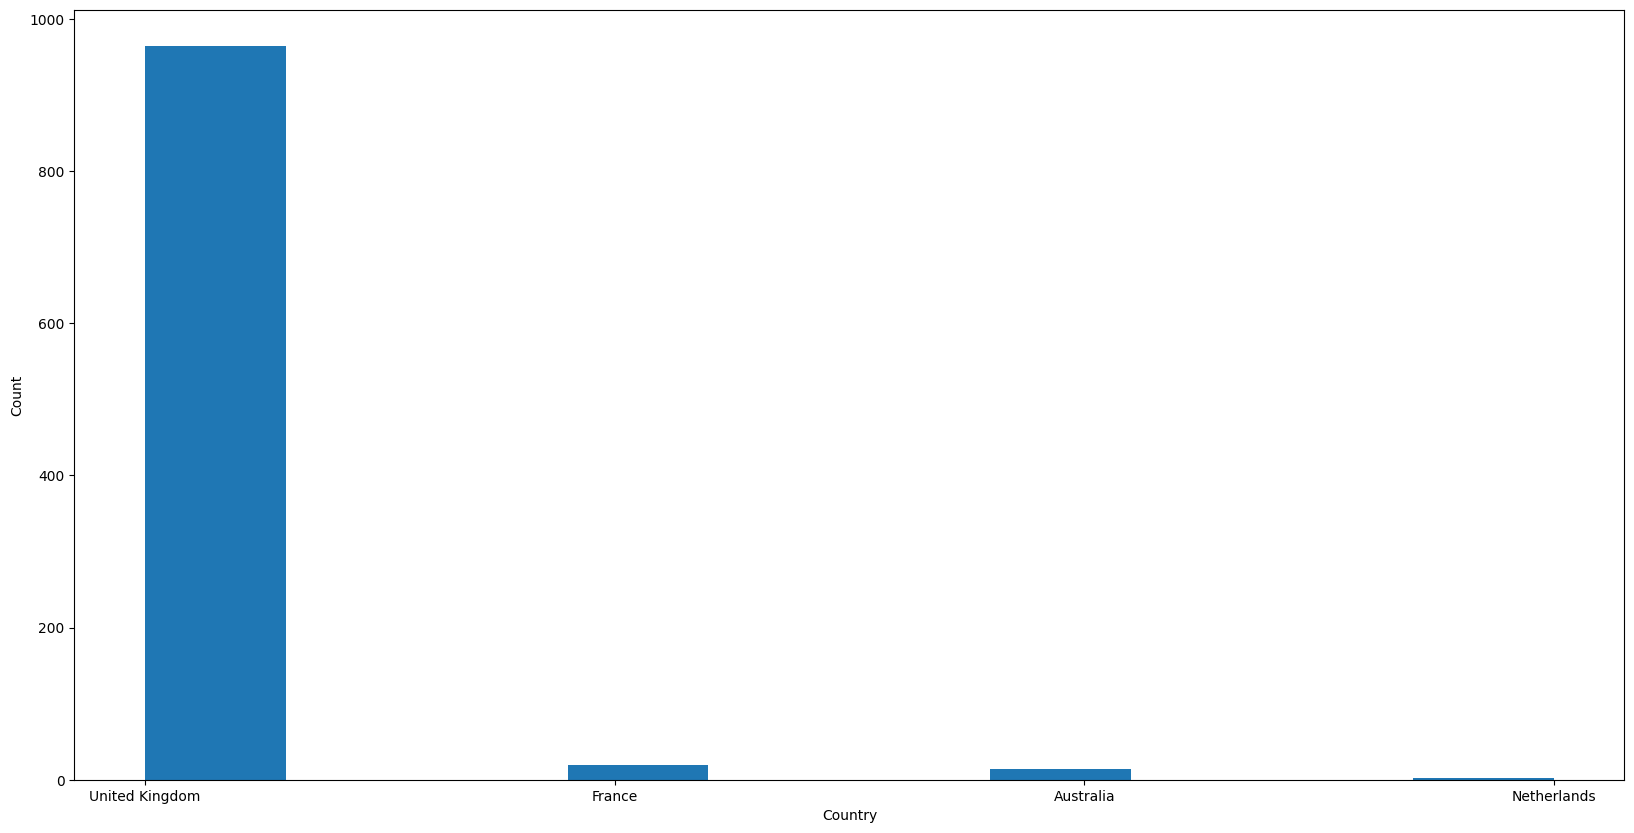

In [ ]:
unique_Country =np.sort(dfshort["Country"].unique())
print(unique_Country)
_ = plt.figure(figsize=(20, 10))
plt.hist(dfshort["Country"])
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


<ipython-input-18-1a713867a29c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfshort["Month"] = pd.to_datetime(dfshort["InvoiceDate"])


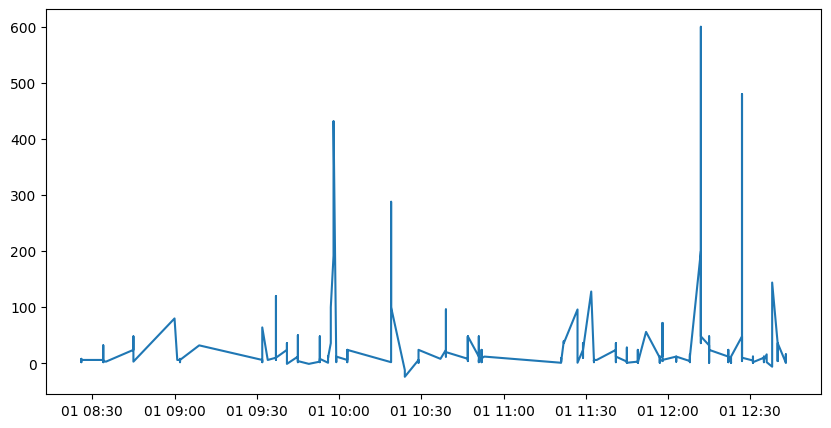

In [ ]:
dfshort["Month"] = pd.to_datetime(dfshort["InvoiceDate"])
_ = plt.figure(figsize=(10, 5))
plt.plot(dfshort["Month"], dfshort["Quantity"])
plt.show()

4


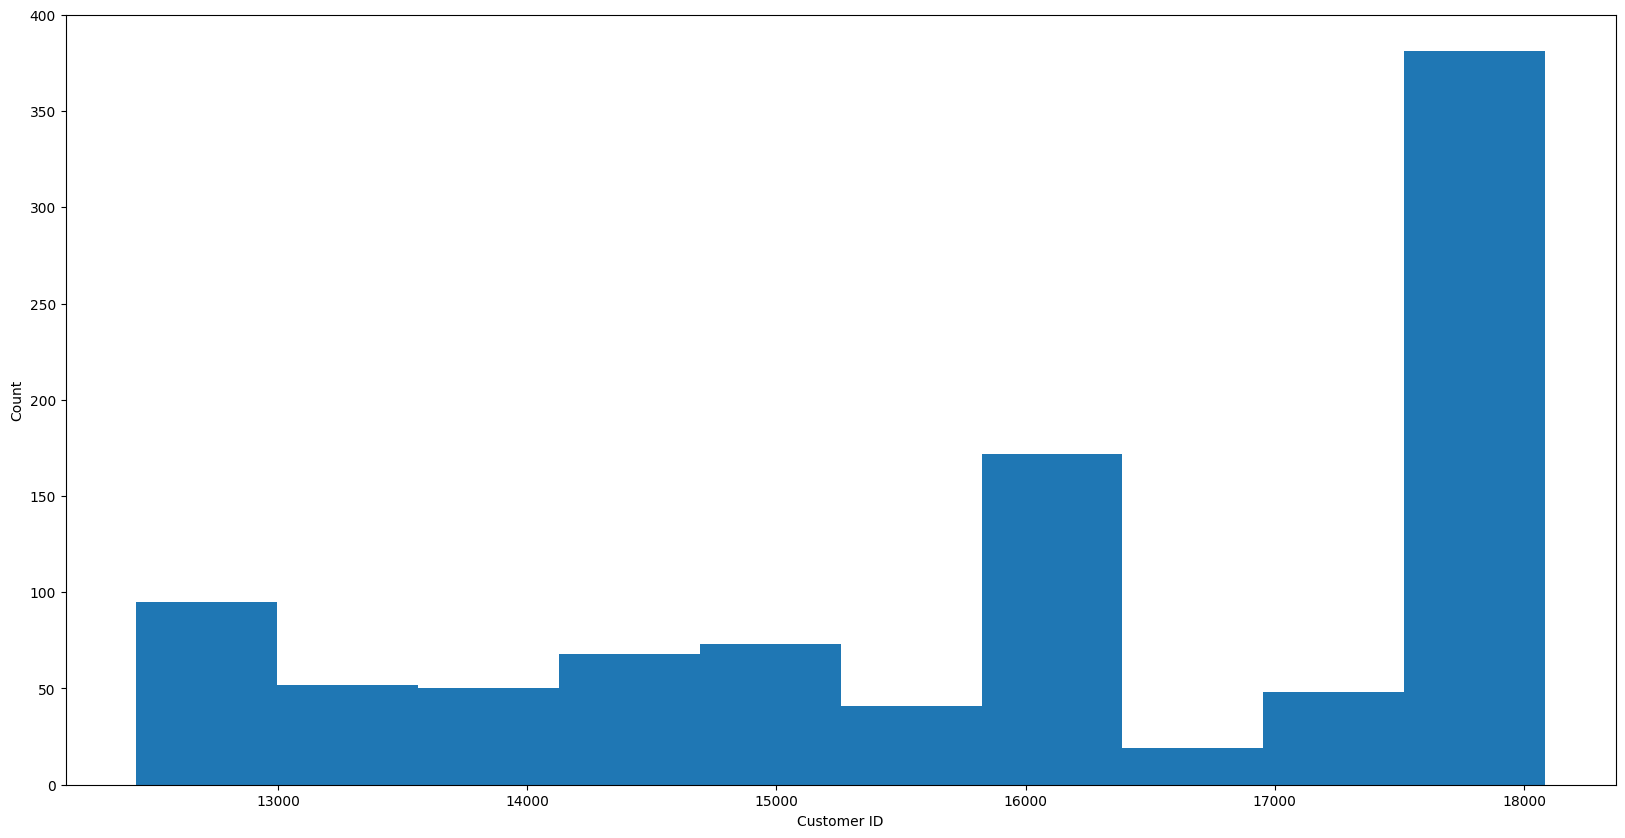

In [ ]:
unique_CustomerID =np.sort(dfshort["Country"].unique())
print(len(unique_CustomerID))
_ = plt.figure(figsize=(20, 10))

plt.hist(dfshort["Customer ID"])
plt.xlabel("Customer ID")
plt.ylabel("Count")
plt.show()

[35.7, 67.8, 5.5, 200.0099999999997, 57.63, 45.9, 46.75, 33.30000000000001, 11.1, 42.5, 4.95, 4.95, 84.15000000000002, 23.660000000000004, 2.1, 100.79999999999993, 3.75, 31.349999999999987, 233.75, 9.9, 9.95, 11.9, 5.95, 23.85, 508.7999999999995, 190.39999999999992, 30.0, 45.0, 52.5, 23.800000000000008, 9.100000000000001, 4.25, 17.5, 5.9, 44.25000000000001, 13.649999999999999, 46.80000000000001, 13.649999999999999, 0.85, 31.349999999999987, 2.95, 217.5, 34.02000000000007, 0.84, 3.25, 1530.0, 33.150000000000006, 16.65, 0]


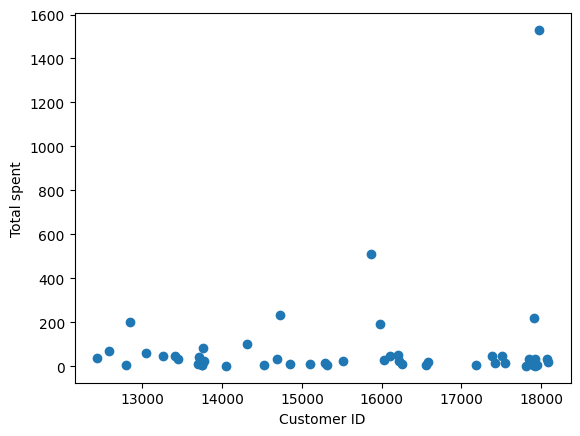

In [ ]:
listx=[]
listx =np.sort(dfshort["Customer ID"].unique())
listy=[0] * len(listx)
sum=0

for i in range(len(listx)-1):
  for j in dfshort["Customer ID"]:
    if listx[i]==j:
      sum+=dfshort["Price"][i]
      listy[i]=sum

    else:
      sum=0
print(listy)
_ = plt.figure()
plt.scatter(listx,listy)
plt.xlabel("Customer ID")
plt.ylabel("Total spent")
plt.show()

# 2.	Build a machine learning model to predict the likelihood of a patient having heart disease based on various medical attributes.



In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)
x = heart_disease.data.features
y = heart_disease.data.targets
x=x.dropna(axis=0)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


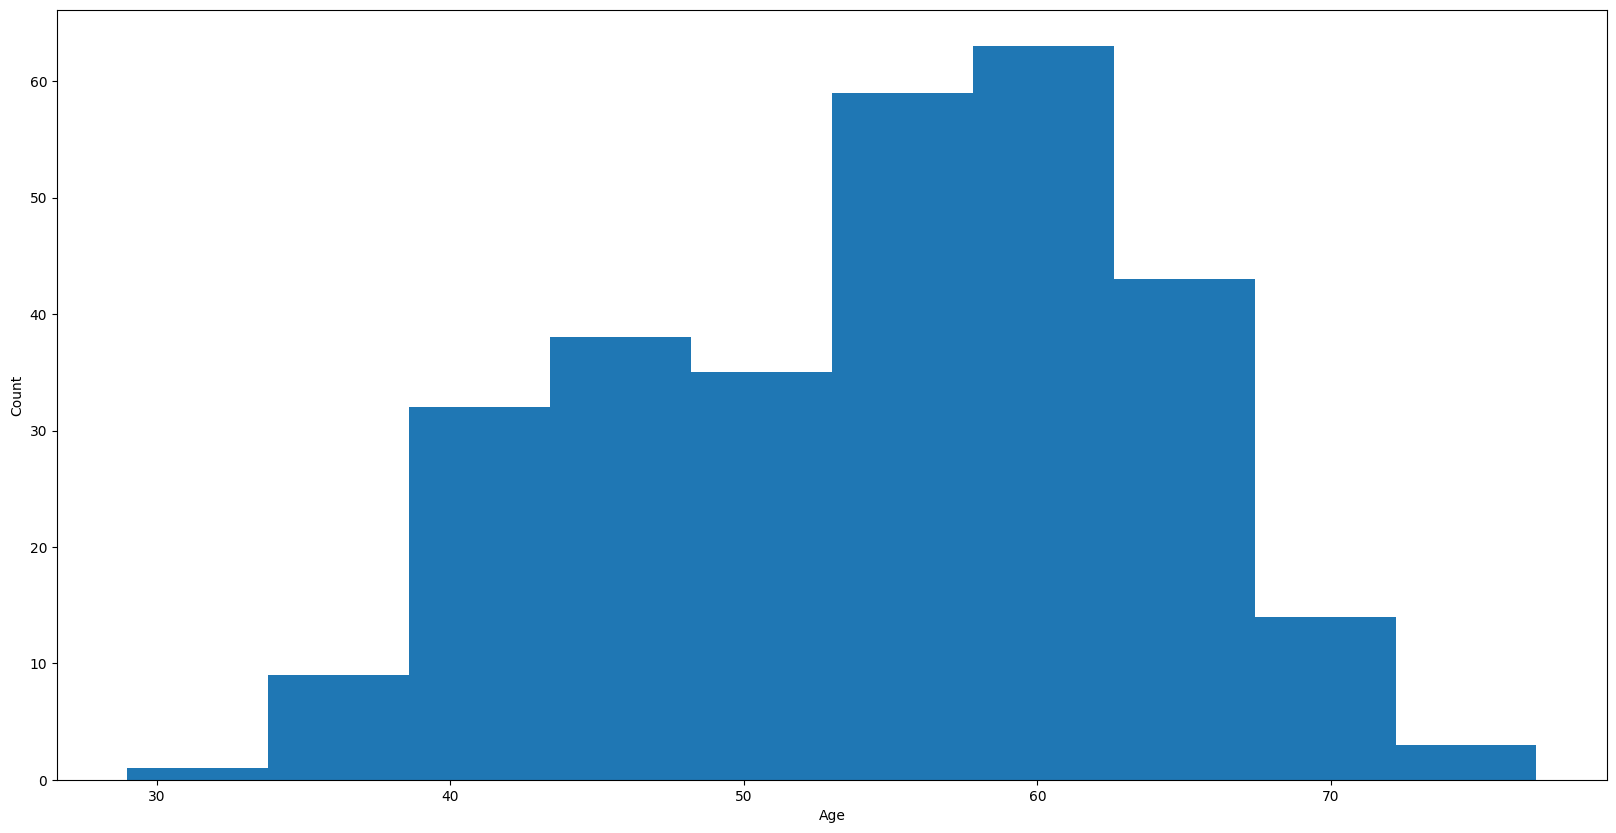

In [ ]:
_ = plt.figure(figsize=(20, 10))
plt.hist(x.age)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

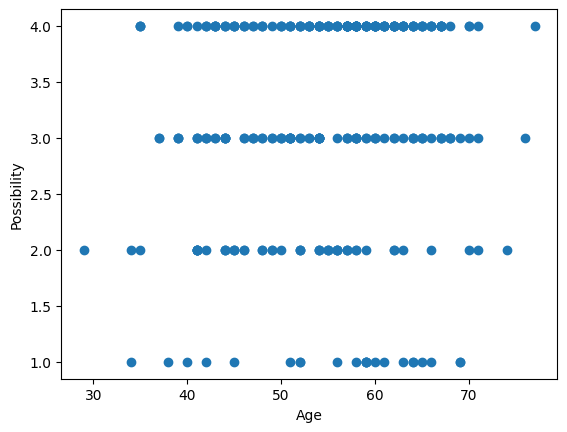

In [ ]:
_ = plt.figure()
plt.scatter(x.age,x.cp)
plt.xlabel("Age")
plt.ylabel("Possibility")
plt.show()

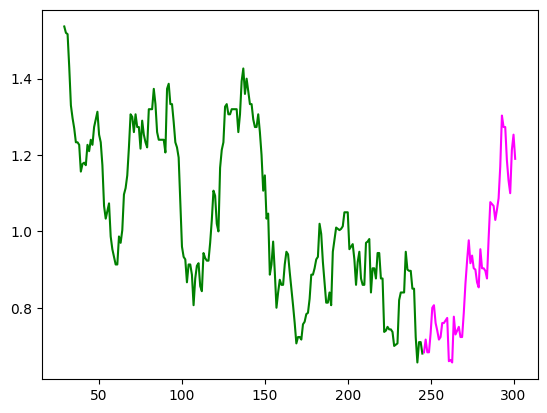

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
returns = x.oldpeak
returns = returns.rolling(window=30).mean().dropna()

n_observations = len(returns)
returns_train = returns.iloc[:int(0.8 * n_observations)]
returns_test = returns.iloc[int(0.8 * n_observations):]

_ = plt.plot(dpi=150)
plt.plot(returns_train.index, returns_train, c="green")
plt.plot(returns_test.index, returns_test, c="magenta")
plt.show()
